<a href="https://colab.research.google.com/github/ddekun/Data_analysis_algorithms/blob/lesson2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритмы анализа данных

## Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

### Домашнее задание
Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [103]:
X, y = make_regression(n_samples=1000, n_features=10, noise=10)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

In [112]:
def gradient_descent(X, y, alpha=0.001, max_iters=2000):
    theta = np.zeros(X.shape[1])
    mse_list = []
    for i in range(max_iters):
        y_pred = np.dot(X, theta)
        mse = np.mean((y_pred - y) ** 2)
        mse_list.append(mse)
        grad = np.dot(X.T, y_pred - y) / len(y)
        theta -= alpha * grad
    return theta, mse_list


def stochastic_gradient_descent(X, y, alpha=0.001, max_iters=2000, batch_size=32):
    theta = np.zeros(X.shape[1])
    mse_list = []
    for i in range(max_iters):
        idx = np.random.choice(len(y), batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        y_pred = np.dot(X_batch, theta)
        mse = np.mean((y_pred - y_batch) ** 2)
        mse_list.append(mse)
        grad = np.dot(X_batch.T, y_pred - y_batch) / len(y_batch)
        theta -= alpha * grad
    return theta, mse_list

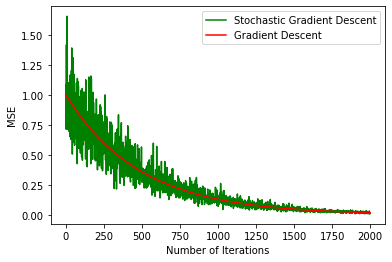

In [120]:
gd_theta, gd_mse = gradient_descent(X, y)
sgd_theta, sgd_mse = stochastic_gradient_descent(X, y)

plt.plot(sgd_mse, color='g', label='Stochastic Gradient Descent')
plt.plot(gd_mse, color='r', label='Gradient Descent')
plt.xlabel('Number of Iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

Из графика видно, что стохастический градиентный спуск сходится быстрее, чем градиентный спуск. Это происходит потому, что стохастический градиентный спуск использует только небольшую случайную подвыборку данных на каждой итерации, что позволяет быстрее достигать локального минимума. Однако, за счет использования случайных подвыборок, стохастический градиентный спуск не гарантирует точности, которая достигается при градиентном спуске на всем наборе данных. Кроме того, стохастический градиентный спуск может страдать от высокой дисперсии на начальных итерациях, которая со временем уменьшается по мере улучшения модели.

Таким образом, выбор между градиентным спуском и стохастическим градиентным спуском зависит от конкретной задачи и доступных ресурсов. Если вы обучаете модель на большом наборе данных, стохастический градиентный спуск может быть более эффективным, тогда как на небольшом наборе данных или при высоких вычислительных мощностях градиентный спуск может быть более точным.